In [1]:
%matplotlib inline
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import numpy as np
import matplotlib.pyplot as plt

# holo_cube = np.load('../shampoo/holo_cube.npy')
# med = np.load('../shampoo/median.npy')

kwargs = dict(origin='lower', interpolation='nearest',
              cmap=plt.cm.viridis)

In [2]:
positions = np.load('../shampoo/positions_2d.npy')

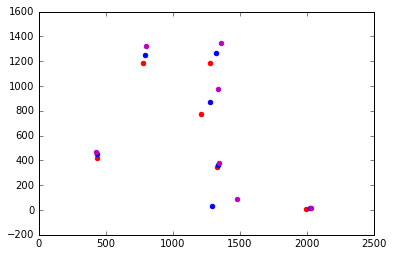

In [3]:
#fig, ax = plt.subplots(figsize=(14, 6))
fig, ax = plt.subplots()

p1 = positions[positions[:, 0] == 101, 1:3]
p2 = positions[positions[:, 0] == 102, 1:3]
p3 = positions[positions[:, 0] == 103, 1:3]

for p, c in zip([p1, p2, p3], ['r', 'b', 'm']):
    for p_i in p:
        ax.scatter(*p_i, color=c)

agglomerative clustering [docstring](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering)

Tips on agglomerative clustering options [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_clustering.html)

kneighbors_graph [docstring](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.kneighbors_graph.html)

/Users/bmmorris/anaconda/lib/python3.5/site-packages/sklearn/neighbors/graph.py:37: DeprecationWarning: The behavior of 'kneighbors_graph' when mode='connectivity' will change in version 0.18. Presently, the nearest neighbor of each sample is the sample itself. Beginning in version 0.18, the default behavior will be to exclude each sample from being its own nearest neighbor. To maintain the current behavior, set include_self=True.
  "behavior, set include_self=True.", DeprecationWarning)
/Users/bmmorris/anaconda/lib/python3.5/site-packages/sklearn/cluster/hierarchical.py:443: UserWarning: the number of connected components of the connectivity matrix is 29 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_components = _fix_connectivity(X, connectivity)


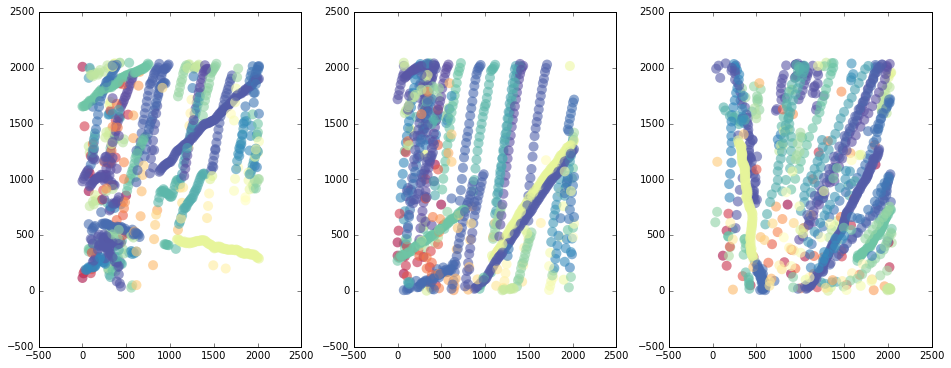

In [4]:
X = positions[:, 0:3].copy()
X[:, 0] *= positions[:, 1].ptp()/positions[:, 0].ptp()

from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

linkages = ('average', 'complete', 'ward')

n_clusters = 150
knn_graph = kneighbors_graph(X, n_neighbors=3, metric='euclidean') # n_neighbors=3,  #, include_self=False
                             #mode='distance' # mode='connectivity'
model = AgglomerativeClustering(linkage=linkages[0],
                                connectivity=knn_graph,
                                n_clusters=n_clusters,
                                #affinity='cosine') 
                                affinity='euclidean')

# Affinity parameter is a `metric`: 
# https://en.wikipedia.org/wiki/Hierarchical_clustering#Metric

model.fit(X)
fig, ax = plt.subplots(1, 3, figsize=(16, 6))

kwargs = dict(s=100, alpha=0.6, edgecolor='none', cmap=plt.cm.Spectral,
              c=model.labels_)
ax[0].scatter(X[:, 0], X[:, 1], **kwargs)

ax[1].scatter(X[:, 0], X[:, 2], **kwargs)

ax[2].scatter(X[:, 1], X[:, 2], **kwargs)

#for axis in ax:
#    axis.set_xlim([0, 2048])
#    axis.set_ylim([0, 2048])

150
n clusters with >10 points: 21


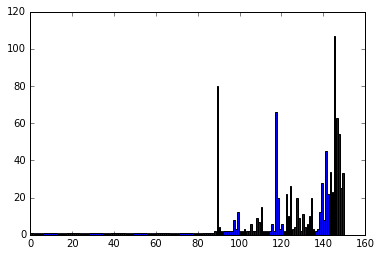

In [5]:
labels = model.labels_
ll = labels.tolist()
counter = 0
for l in set(ll):
    plt.bar(l, ll.count(l))
    if ll.count(l) > 10:
        counter += 1
print(len(set(ll)))
print("n clusters with >10 points: {0}".format(counter))

In [6]:
# for i, l in enumerate(set(ll)):
#     this_label = labels == l
#     if np.count_nonzero(this_label) > 8:
#         plt.scatter(X[this_label, 1], X[this_label, 2], color='r')
#         plt.scatter(X[~this_label, 1], X[~this_label, 2], color='gray', alpha=0.5, s=5)
#         plt.xlim((0, 2048))
#         plt.ylim((0, 2048))
#         plt.title("{0}".format(i))
#         plt.show()

Jake's [demo of MST clustering](http://nbviewer.jupyter.org/github/jakevdp/mst_clustering/blob/master/MSTClustering.ipynb)

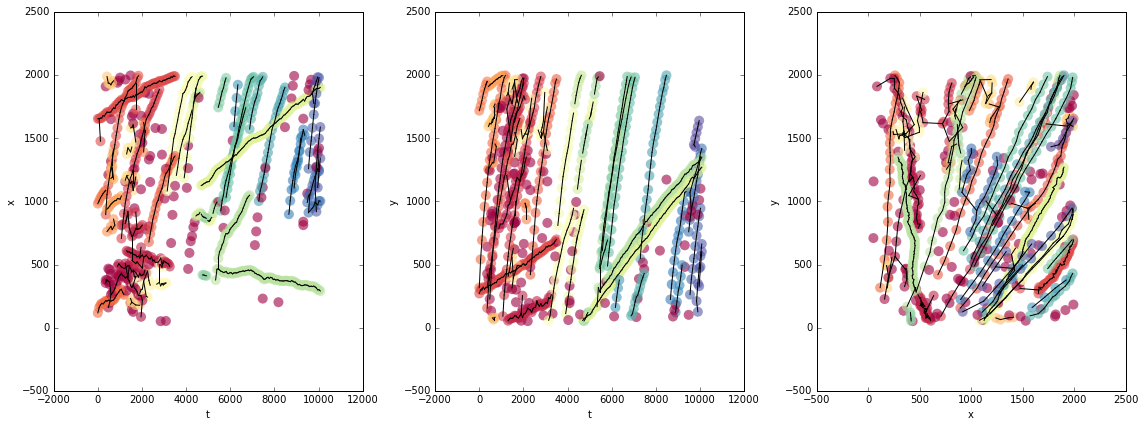

In [7]:
X = positions.copy()
X = X[:, 0:4]
X[:, 0] *= 5*positions[:, 1].ptp()/positions[:, 0].ptp()
X[:, 3] *= positions[:, 1].ptp()/positions[:, 3].ptp()

xy_margin = 50
within_margins = ((X[:, 1] < 2048 - xy_margin) & (X[:, 2] < 2048 - xy_margin) &
                  (X[:, 1] > xy_margin) & (X[:, 2] > xy_margin))
X = X[within_margins]

from mst_clustering import MSTClustering

#model = MSTClustering(cutoff_scale=250, approximate=True, 
model = MSTClustering(cutoff_scale=240, approximate=True, 
                      n_neighbors=2, min_cluster_size=4)
# cutoff_scale=200, min_cluster_size=8)#, approximate=False)

labels = model.fit_predict(X)
plot_segments = True

fig, ax = plt.subplots(1, 3, figsize=(16, 6))
    
kwargs = dict(s=100, alpha=0.6, edgecolor='none', cmap=plt.cm.Spectral,
              c=labels)
ax[0].scatter(X[:, 0], X[:, 1], **kwargs)
ax[1].scatter(X[:, 0], X[:, 2], **kwargs)
ax[2].scatter(X[:, 1], X[:, 2], **kwargs)

ax[0].set(xlabel='t', ylabel='x')
ax[1].set(xlabel='t', ylabel='y')
ax[2].set(xlabel='x', ylabel='y')

if plot_segments:
    segments = model.get_graph_segments(full_graph=False)
    ax[0].plot(segments[0], segments[1], '-k')
    ax[1].plot(segments[0], segments[2], '-k')
    ax[2].plot(segments[1], segments[2], '-k')

#for axis in ax:
#    axis.set(xlim=[0, 2048], ylim=[0, 2048])
fig.tight_layout()

In [8]:
in_cluster_std = []
for l in set(labels):
    in_cluster_std.append(np.sum(np.std(X[labels == l], axis=0)**2))

In [9]:
from sklearn.decomposition import PCA

cutoff_scales = np.linspace(120, 350, 150)
n_neighbors = np.arange(1, 5)

stds = np.zeros((len(cutoff_scales), len(n_neighbors)), dtype=np.float64)

from sklearn.metrics import pairwise_distances

for i in range(cutoff_scales.shape[0]):
    for j in range(n_neighbors.shape[0]):
        model = MSTClustering(cutoff_scale=cutoff_scales[i], approximate=True, 
                              n_neighbors=n_neighbors[j], min_cluster_size=4)
        labels = model.fit_predict(X)
#         in_cluster_std = []
#         for l in set(labels):
#             in_cluster_std.append(np.sqrt(np.sum(np.std(X[labels == l], axis=0)**2)))

        distance_stds = []
        for l in set(labels):
            #d = pairwise_distances(X[labels == l]) 
            #d += 100*np.eye(d.shape[0])
            #min_d = np.min(d, axis=0)
            #distance_stds.append(np.std(min_d)**2)
            #distance_stds.append(np.std(min_d))
            #distance_stds.append(min_d.ptp()/np.median(min_d))
            #plt.plot(np.diff(min_d), '.')
            #distance_stds.append(np.max(np.abs(np.diff(min_d)))/len(min_d))
            if l != -1:
                pca = PCA(n_components=3)
                pca.fit(X[labels == l, 0:3])
                X_prime = pca.transform(X[labels == l, 0:3])
                #sum_stds = np.sqrt(X_prime[:, 1].std()**2/X_prime[:, 1].ptp()**2)# + 
                                   #X_prime[:, 2].std()**2/X_prime[:, 2].ptp()**2)
                #sum_dist = np.sum(np.sqrt((X_prime[:, 1]/X_prime[:, 1].std())**2 + 
                #                          (X_prime[:, 2]/X_prime[:, 2].std())**2))
                #distance_stds.append(sum_dist)
                #distance_stds.append((X_prime[:, 1].ptp() + X_prime[:, 2].ptp())/X_prime[:, 0].ptp()/X_prime.shape[0])
                #distance_stds.append(((X_prime[:, 1].std()/X_prime[:, 0].ptp())**2 + 
                #                      (X_prime[:, 2].std()/X_prime[:, 0].ptp())**2 + 
                #                      (X_prime[:, 3].std()/X_prime[:, 0].ptp())**2 ) / X_prime.shape[0])
                distance_stds.append(X_prime[:, 1].std()/X_prime[:, 0].ptp())
                #plt.show()
        f_labeled = np.count_nonzero(labels != -1)/float(len(labels))
        stds[i, j] = np.mean(np.sqrt(distance_stds))/f_labeled

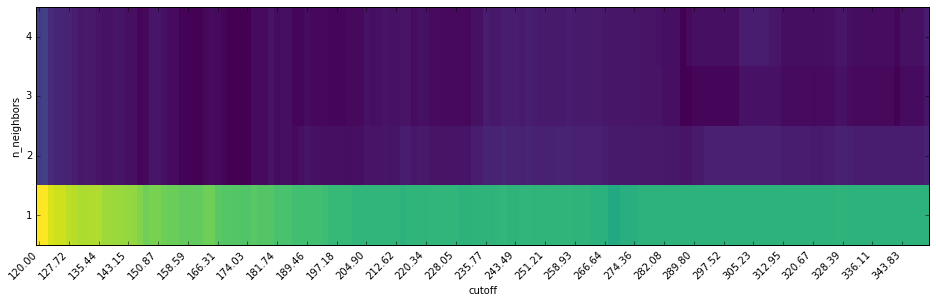

In [10]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.imshow(np.log(stds).T, interpolation='nearest', origin='lower', 
          cmap=plt.cm.viridis)
ax.set_xticks(range(len(cutoff_scales))[::5])
ax.set_xticklabels(["{0:.2f}".format(cutoff_scale) 
                    for cutoff_scale in cutoff_scales[::5]])

ax.set_yticks(range(len(n_neighbors)))
ax.set_yticklabels(range(1, len(n_neighbors)+1))

for l in ax.get_xticklabels():
    l.set_rotation(45)
    l.set_ha('right')

ax.set_xlabel('cutoff')
ax.set_ylabel('n_neighbors')
ax.set_aspect(10)
plt.show()

2 174.026845638


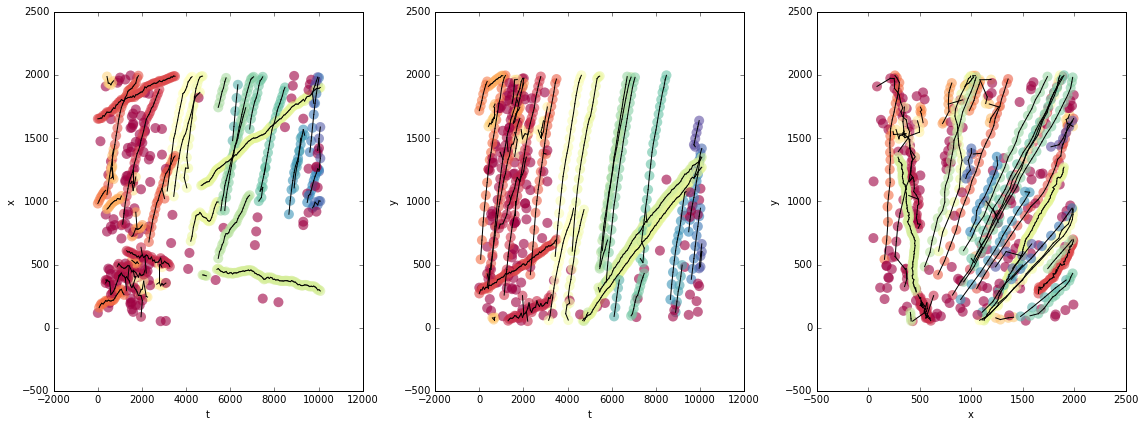

In [11]:
X = positions.copy()
X = X[:, 0:4]
X[:, 0] *= 5*positions[:, 1].ptp()/positions[:, 0].ptp()

xy_margin = 50
within_margins = ((X[:, 1] < 2048 - xy_margin) & (X[:, 2] < 2048 - xy_margin) &
                  (X[:, 1] > xy_margin) & (X[:, 2] > xy_margin))
X = X[within_margins]

from mst_clustering import MSTClustering

# model = MSTClustering(cutoff_scale=200, approximate=True, 
#                      n_neighbors=2, min_cluster_size=4)

x_min_ind, y_min_ind = np.where(stds == stds.min())
n_neighbors_min = n_neighbors[y_min_ind[0]]
cuttoff_scale_min = cutoff_scales[x_min_ind[0]]
print(n_neighbors_min, cuttoff_scale_min)

model = MSTClustering(cutoff_scale=cuttoff_scale_min, approximate=True, 
                      n_neighbors=n_neighbors_min, min_cluster_size=4)

# cutoff_scale=200, min_cluster_size=8)#, approximate=False)

labels = model.fit_predict(X)
plot_segments = True

fig, ax = plt.subplots(1, 3, figsize=(16, 6))
    
kwargs = dict(s=100, alpha=0.6, edgecolor='none', cmap=plt.cm.Spectral,
              c=labels)
ax[0].scatter(X[:, 0], X[:, 1], **kwargs)
ax[1].scatter(X[:, 0], X[:, 2], **kwargs)
ax[2].scatter(X[:, 1], X[:, 2], **kwargs)

ax[0].set(xlabel='t', ylabel='x')
ax[1].set(xlabel='t', ylabel='y')
ax[2].set(xlabel='x', ylabel='y')

if plot_segments:
    segments = model.get_graph_segments(full_graph=False)
    ax[0].plot(segments[0], segments[1], '-k')
    ax[1].plot(segments[0], segments[2], '-k')
    ax[2].plot(segments[1], segments[2], '-k')

#for axis in ax:
#    axis.set(xlim=[0, 2048], ylim=[0, 2048])
fig.tight_layout()

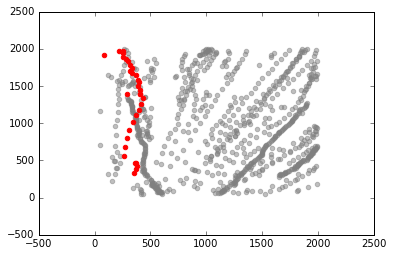

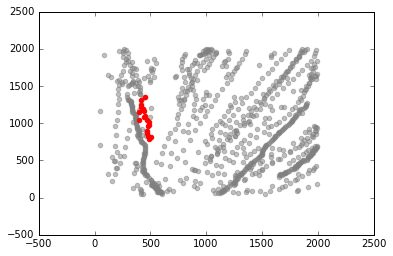

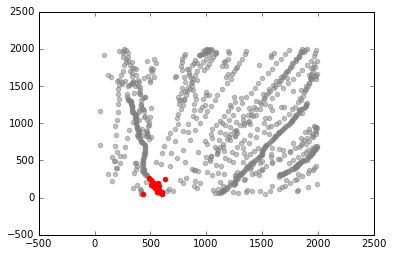

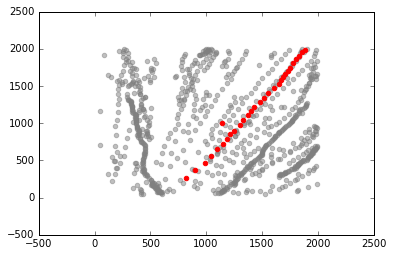

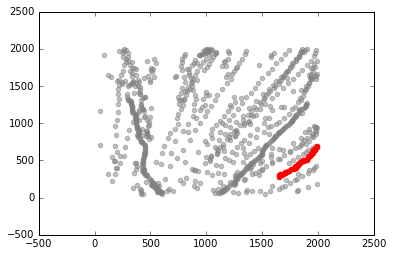

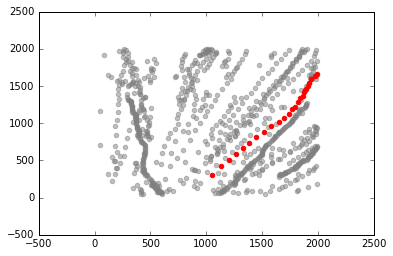

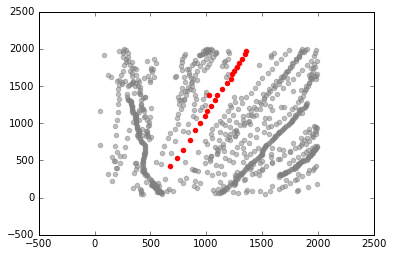

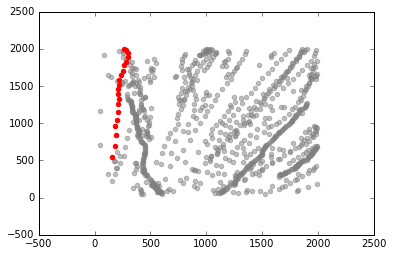

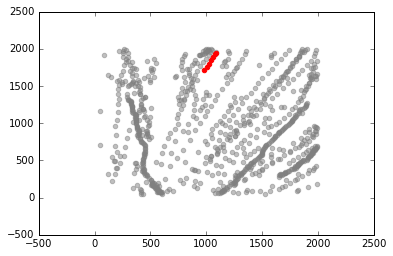

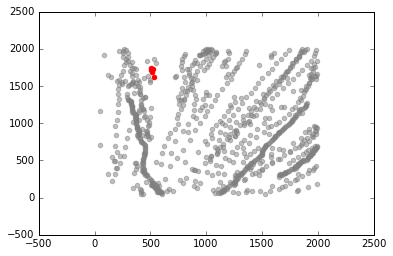

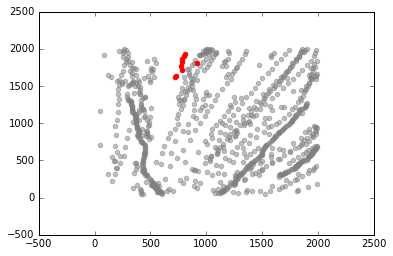

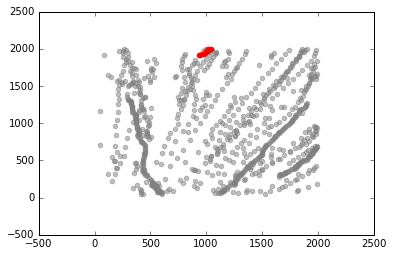

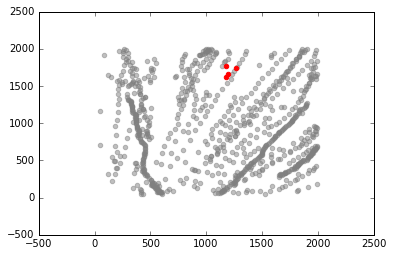

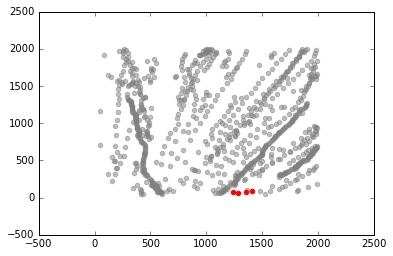

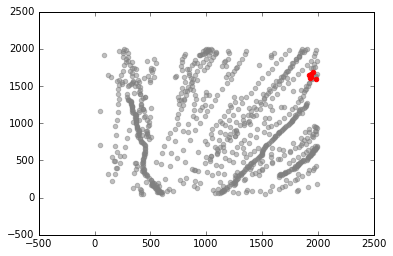

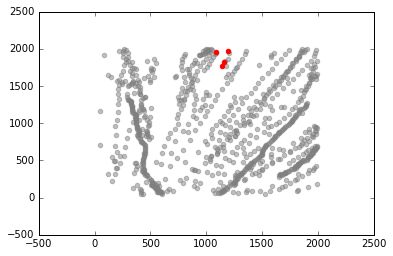

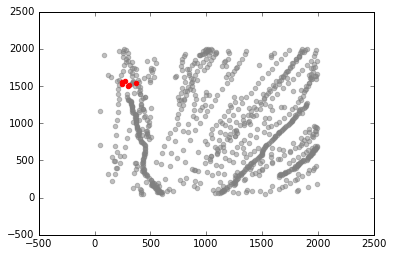

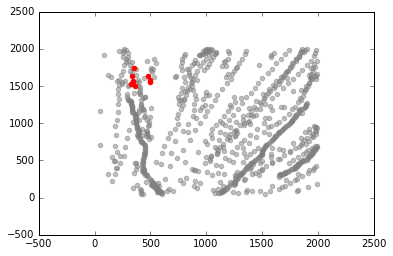

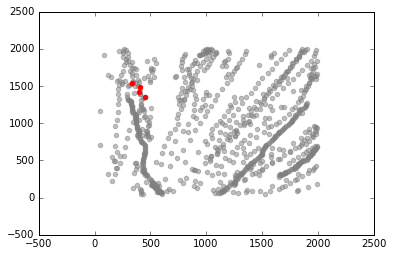

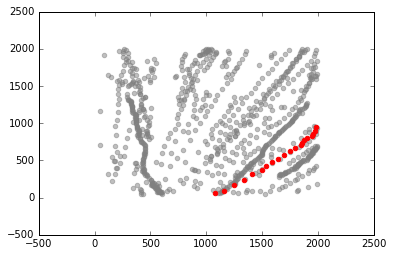

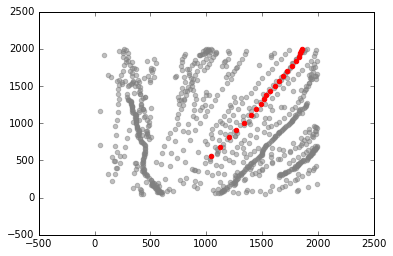

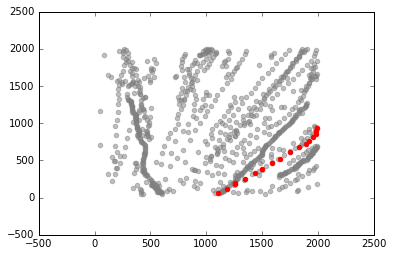

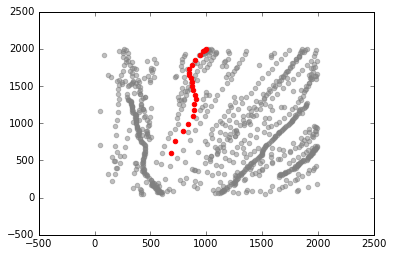

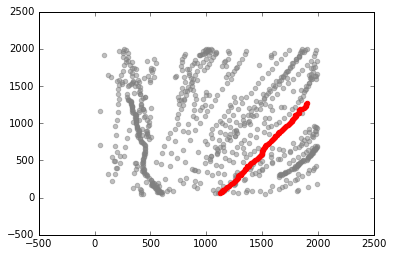

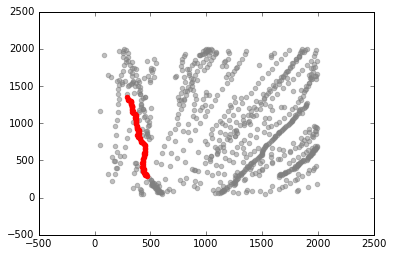

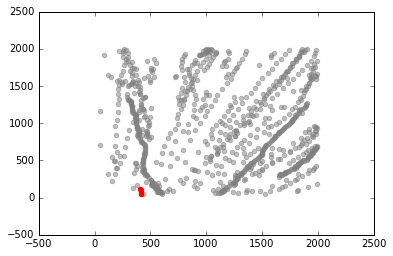

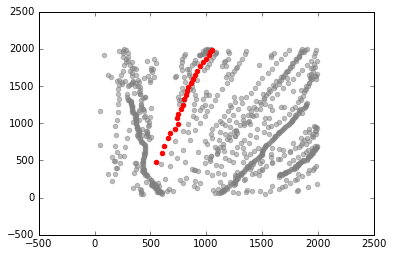

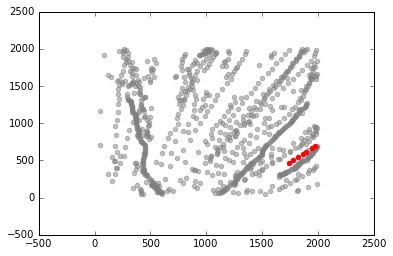

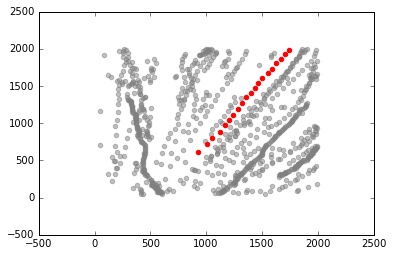

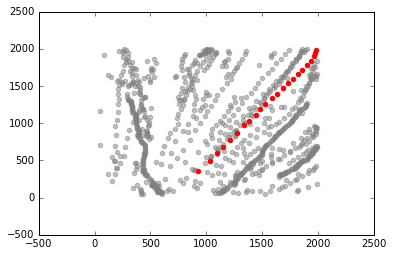

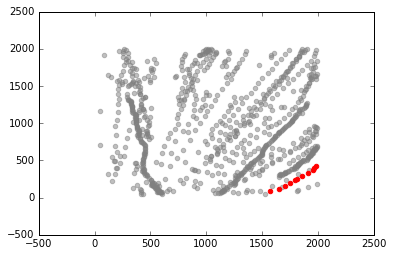

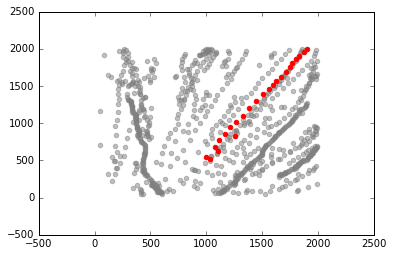

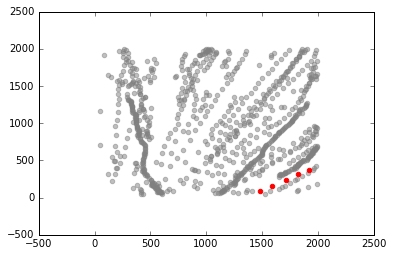

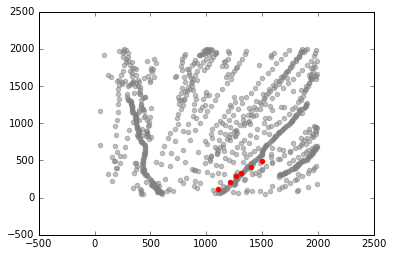

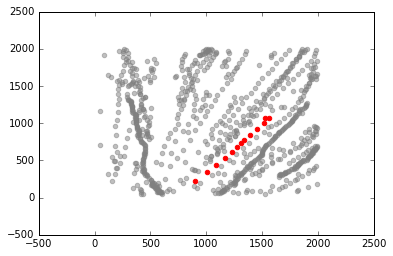

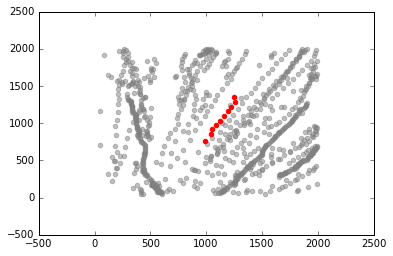

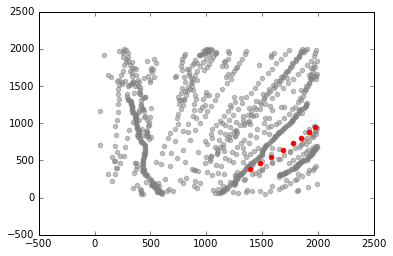

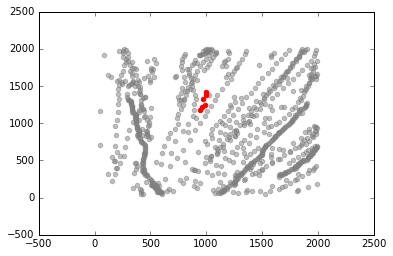

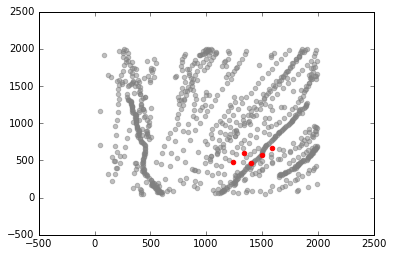

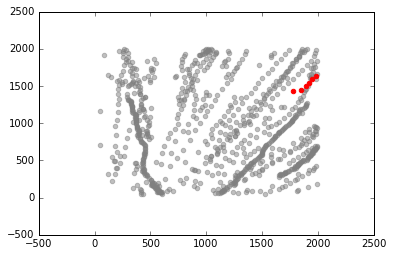

In [12]:
colors = plt.cm.jet(np.linspace(0, 1, len(set(labels))))

for l, c in zip(set(labels), colors):
    if l != -1:
        plt.scatter(X[labels != l, 1], X[labels != l, 2], color='gray', alpha=0.5)
        plt.scatter(X[labels == l, 1], X[labels == l, 2], color='r')

        plt.show()

In [15]:
np.savetxt('tracks.txt', np.column_stack([X, labels]))

In [22]:
%%writefile launchglue.py
import numpy as np
from glue_vispy_viewers.scatter.scatter_viewer import VispyScatterViewer
from glue.core import DataCollection, Data
from glue.app.qt.application import GlueApplication

X = np.loadtxt('tracks.txt')
data = Data(x=X[:, 0], y=X[:, 1], z=X[:, 2],
            labels=X[:, -1], label='data')
dc = DataCollection([data])

# create a GUI session
ga = GlueApplication(dc)
scatter = ga.new_data_viewer(VispyScatterViewer)
scatter.add_data(data)

options = scatter.options_widget()

options.x_att = data.id['x']
options.y_att = data.id['y']
options.z_att = data.id['z']

ga.exec_()
ga.start()

Overwriting launchglue.py


In [26]:
%%bash
python launchglue.py

Traceback (most recent call last):
